In [1]:
import runregistry
import myfunctions as func

2022-04-27 17:10:39.598524: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft.cern.ch/lcg/releases/MCGenerators/thepeg/2.2.1-8d929/x86_64-centos7-gcc8-opt/lib/ThePEG:/cvmfs/sft.cern.ch/lcg/releases/MCGenerators/herwig++/7.2.1-f3599/x86_64-centos7-gcc8-opt/lib/Herwig:/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/torch/lib:/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/tensorflow:/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/tensorflow/contrib/tensor_forest:/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/tensorflow/python/framework:/cvmfs/sft.cern.ch/lcg/releases/java/8u222-884d8/x86_64-centos7-gcc8-opt/jre/lib/amd64:/cvmfs/sft.

In [2]:
import pandas as pd
import glob
import os
import sys
import numpy as np
mypath="/eos/user/a/anushree/SWAN_projects/ML_Per_LS_DQMIO_Data_test/PixelStudy/2017_csv"
listoffiles = glob.glob(os.path.join(mypath, "*.csv*"))
dflist = [pd.read_csv(f) for f in listoffiles]
file_num=np.shape(dflist)[0]
print(file_num)

2


In [4]:
df=dflist[0]

In [6]:
from ast import literal_eval
df['histo']=df['histo'].apply(literal_eval)

df.set_index(['fromrun','fromlumi'], inplace=True, drop=False)

df.sort_index(inplace=True)


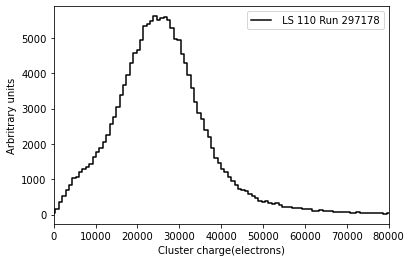

In [7]:
func.PlotHist(df,297178,110,80000.0,0.0,100 )

In [8]:
#load the golden json file
import json
jsondata={}
#with open('Golden18.json') as json_file:
with open('GoldenJSON17.json') as json_file:
    jsondata = json.load(json_file)

In [9]:
df['labels']=False
for run in df['fromrun'].unique():
    for ls in df['fromlumi'][run]:
        df['labels'][run][ls]=func.checkLS(run,ls,jsondata)

In [10]:
#load the golden json file
jsondata={}
#with open('Golden18.json') as json_file:
with open('json_dir/customized_trk_2017.json') as json_file:
    jsondata = json.load(json_file)


In [13]:
df['customlabels']=False #initialize to false
for run in df['fromrun'].unique():
    for ls in df['fromlumi'][run]:
        df['customlabels'][run][ls]=func.checkLS(run,ls,jsondata)

In [14]:
import sys
from urllib.error import HTTPError
Cerfdf="file.json"
try:
    url="https://certhelper.web.cern.ch/mldatasets/allRunsRefRuns/"
    Certdf=pd.read_json(url)
except HTTPError:
    url="allRunsRefRuns.json"
    Certdf=pd.read_json(url)

In [16]:
refrun_list=np.unique(np.array(Certdf['reference_run_number'][Certdf['reference_run_reconstruction_type']=='rerecoul']))
refrunsize=np.shape(refrun_list) 
refrunsize = int(''.join(map(str, refrunsize))) 
print(refrunsize)
Certdf_run=[]
for i in range(refrunsize):
    run=[]
    run=np.array(Certdf['run_number'][Certdf['reference_run_number']==refrun_list[i]][Certdf['reference_run_reconstruction_type']=='rerecoul'][Certdf['run_reconstruction_type']=='rerecoul'])
    Certdf_run.append(run)

23


In [17]:
gain_array=np.array([1, 126418, 184234, 186500, 197749, 203368, 233749, 255731, 265850, 278087, 290543, 298653, 303790, 312203, 318227, 319937, 319943, 320377, 323232, 326851])
gain_length=len(gain_array)
IOV_num=np.arange(20)

In [18]:
IOV_tag=[]
for run in df['fromrun']:
    #for ls in dfhighstat['fromlumi'][run]:
    IOV_tag.append(func.find_IOV(run,gain_array))
    #dfhighstat['IOV']=find_IOV(run)

In [19]:
print(np.shape(IOV_tag))
df['IOV']=IOV_tag

(216045,)


In [20]:
dfhighstat=df.loc[df['entries']>0]

In [26]:
import math
def split_dataframe(df, chunk_size = 10000): 
    chunks = list()
    num_chunks = math.ceil(len(df) / chunk_size) #len(df) // chunk_size + 1
    #print(num_chunks)
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return chunks, num_chunks

##find the standard lumi
df_all=np.array(dfhighstat['histo'])
df_std=np.array(dfhighstat['histo'][dfhighstat['labels']==True].values)
df_nojson=np.array(dfhighstat['histo'][dfhighstat['labels']==False].values)
#df_std_split, numchunk = split_dataframe(df_std, chunk_size=500)

lumi_all=np.array(dfhighstat['fromlumi'])
lumi_std=np.array(dfhighstat['fromlumi'][dfhighstat['labels']==True].values)
lumi_nojson=np.array(dfhighstat['fromlumi'][dfhighstat['labels']==False].values)
#lumi_std_split, num=split_dataframe(lumi_std, chunk_size=500)

run_all=np.array(dfhighstat['fromrun'])
run_std=np.array(dfhighstat['fromrun'][dfhighstat['labels']==True].values)
run_nojson=np.array(dfhighstat['fromrun'][dfhighstat['labels']==False].values)
#run_std_split, num=split_dataframe(run_std, chunk_size=500)

label_all=np.array(dfhighstat['labels'])
customlabel_all=np.array(dfhighstat['customlabels'])
#label_std_split, num=split_dataframe(label_std, chunk_size=500)

IOV_all=np.array(dfhighstat['IOV'])
IOV_std=np.array(dfhighstat['IOV'][dfhighstat['labels']==True].values)
Entries_all=np.array(dfhighstat['entries'])
Entries_std=np.array(dfhighstat['entries'][dfhighstat['labels']==True].values)

In [27]:
for i in range(refrunsize):
    runcheck=i
    ref_run=refrun_list[runcheck]
    totalrun=func.group_data(df_std, run_std, ref_run)

In [29]:
refrunhistolist=[]
refrunlistnonzero=[]
testrunlistnonzero=[]
for i in range(refrunsize):
    runcheck=i
    ref_run=refrun_list[runcheck]
    refrunlist=func.group_data(df_std, run_std, ref_run)
    refshape=np.shape(refrunlist)
    refshape=int(''.join(map(str, refshape)))
    if(refshape>0):
        refrunhistolist.append(refrunlist)
        refrunlistnonzero.append(ref_run)
        testrunlistnonzero.append(Certdf_run[i])

In [31]:
runcheck=0

In [32]:
ref_run=refrunlistnonzero[runcheck]
print(ref_run)
indices=np.where(run_std==ref_run)
Entries_refrun=(Entries_std[indices])
lowind=np.where(Entries_refrun<50000)
data_Lowcnt=func.group_ind(refrunhistolist[runcheck], lowind)
ref_lumi=func.group_ind(lumi_std,indices)
ref_lumi_lowcnt=func.group_ind(ref_lumi,lowind)
ref_lumi_highstat=np.delete(ref_lumi,lowind)
print(np.shape(data_Lowcnt))
print(ref_run.shape)
print(ref_lumi_highstat.shape)


297178
(7, 100)
()
(1333,)


Text(0.5, 0, 'Total number entries in each histogram')

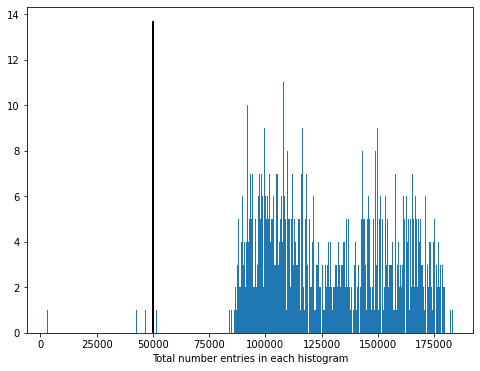

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[8,6])
ax.hist(Entries_refrun,700)
y_min, y_max = ax.get_ylim()
plt.plot([50000, 50000], [y_min, y_max], 'k-', lw=2)
plt.xlabel("Total number entries in each histogram")

In [37]:
print(np.shape(refrunhistolist[runcheck]))

(1340, 100)


In [38]:
import keras
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF
import math
from keras import backend as K
import tensorflow as tf

indexdl=np.array([61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,77,89,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
lowCntind=(np.where(Entries_refrun<50000))
data_train = np.stack(refrunhistolist[runcheck], axis=0)
data_train_dl=np.delete(data_train, indexdl, axis=1)
data_train_dl_highstat=np.delete(data_train_dl, lowCntind, axis=0)
data_train_dl=normalize(data_train_dl, norm='l1', axis=1)
data_train_dl_highstat=normalize(data_train_dl_highstat, norm='l1', axis=1)
data_train=normalize(data_train, norm='l1', axis=1)

In [39]:
refrun_train=data_train_dl_highstat
model= NMF(n_components=6, max_iter=500, solver="mu", verbose=False)
H_ref=model.fit_transform(refrun_train)
W_ref=model.components_
print(H_ref.shape)
print(W_ref.shape)

/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


(1333, 6)
(6, 62)


In [40]:
print(np.max(refrunhistolist[runcheck]))

6082


In [41]:
print(np.shape(refrun_train))

(1333, 62)


In [42]:
tot=np.zeros(refrun_train.shape)
tot=np.matmul(H_ref,W_ref)
mse_err_ref=func.MSE_dist(refrun_train,tot)
dist_eucl_ref, dist_cor_ref=func.distance_mes(refrun_train,tot)

2022-04-27 17:27:30.536373: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /cvmfs/sft.cern.ch/lcg/releases/MCGenerators/thepeg/2.2.1-8d929/x86_64-centos7-gcc8-opt/lib/ThePEG:/cvmfs/sft.cern.ch/lcg/releases/MCGenerators/herwig++/7.2.1-f3599/x86_64-centos7-gcc8-opt/lib/Herwig:/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/torch/lib:/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/tensorflow:/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/tensorflow/contrib/tensor_forest:/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/tensorflow/python/framework:/cvmfs/sft.cern.ch/lcg/releases/java/8u222-884d8/x86_64-centos7-gcc8-opt/jre/lib/amd64:/cvmfs/sft.cern.ch/lc

Text(0.1, 0.00165, 'Run297178')

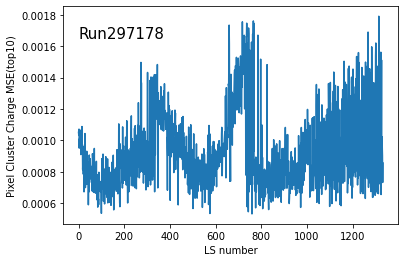

In [45]:
plt.plot(mse_err_ref, label='ChargeInner_Pxlayer1')


plt.xlabel("LS number")
plt.ylabel("Pixel Cluster Charge MSE(top10)")
plt.text(0.1,0.00165,'Run'+str(ref_run),fontsize=15)#,weight="bold")

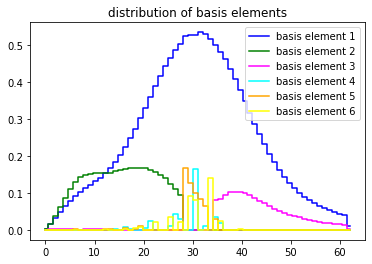

In [46]:
func.plotComponents(W_ref,"6_gt30000entries_standard")

tot shape (1333, 62)
truedata.shape (62,)
6
(1333, 6)
tot shape after multiplication before mean= (1333, 62)
tot shape after multiplication= (62,)
tot shape of Haverage= (6,)
94.06
4.73
0.79
0.09
0.22
0.12
err 1.8526253574061107e-05


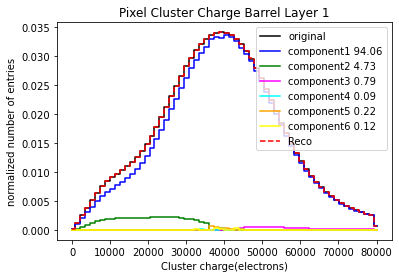

In [47]:
fact=1
#plotDecomposition_notallcomp(100,refrun_train,W_ref,H_ref,"test_")
func.plotDecomposition_average(refrun_train,W_ref,H_ref,"6_gt30000entries_all_")

In [48]:
#run list for "rerecoul"
run_to_test=testrunlistnonzero[runcheck]
mse_err_list=[]
dist_eucl_list=[]
dist_cor_list=[]
H_all=[]
H_train_all=[]
test_data_list=[]
actual_runtest=[]
count=0
indexdl=np.array([61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,77,89,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
for j in range(len(run_to_test)):
    test_data=func.group_data(df_all, run_all, run_to_test[j])
    #print(np.shape(test_data))
    shape=np.int32(np.shape(test_data)[0])
    #print(shape)
    if(shape==0):
        continue
    actual_runtest.append(run_to_test[j])
    #j=np.array(j)
    test_data = np.stack(test_data, axis=0)
    count=count+(np.shape(test_data)[0])
    test_data=np.delete(test_data, indexdl, axis=1)
    test_data=normalize(test_data, norm='l1', axis=1)
    test_data_list.append(test_data)
    H_test=model.transform(test_data)
    H_all.append(H_test)
    tot=np.zeros(test_data.shape)
    tot=np.matmul(H_test,W_ref)
    mse_err_test=func.MSE_dist(test_data,tot)
    mse_err_list.append(mse_err_test)
    dist_eucl,dist_cor=func.distance_mes(test_data,tot)
    dist_eucl_list.append(dist_eucl)
    dist_cor_list.append(dist_cor)
print(count)

12572


6
78.92
0.7891797863234685 0
0.00
1.7840503610842627e-06 1
16.91
0.16911650044606052 2
0.29
0.002860379787001705 3
2.87
0.02874064458058635 4
2.27
0.022679428176254894 5
tottttttttt   1.012578523363733
1.0000000000000002
(62,)
err 0.0034290511283076603


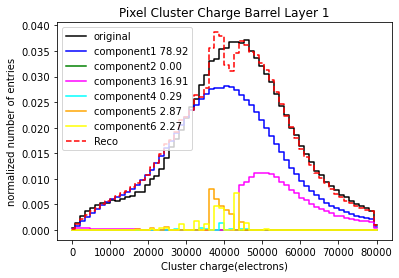

In [50]:
func.plotDecomposition_notallcomp(5,test_data_list[4],W_ref,H_all[0],"test_")

tot shape (15, 62)
truedata.shape (62,)
6
(15, 6)
tot shape after multiplication before mean= (15, 62)
tot shape after multiplication= (62,)
tot shape of Haverage= (6,)
66.13
26.41
3.45
0.11
2.52
0.83
err 0.0009624406567471505


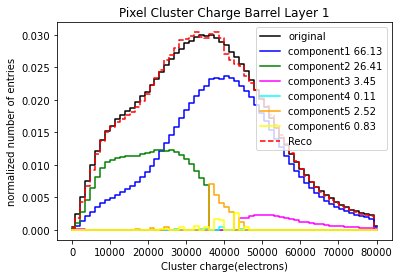

In [51]:
func.plotDecomposition_average(test_data_list[10],W_ref,H_all[10],"6_gt30000entries_all_")

In [52]:
IOV_list=[]
for i in range(len(actual_runtest)):
    indices=np.where(run_all==actual_runtest[i])
    IOV_list.append(np.unique(IOV_all[indices])[0])
print(IOV_list)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10]


In [54]:
### plot the error distribution
print(actual_runtest[0])
for i in range (len(actual_runtest)):
    plt.subplots()
    plt.plot(mse_err_list[i])

Text(0.5, 15.0, 'Number of bins')

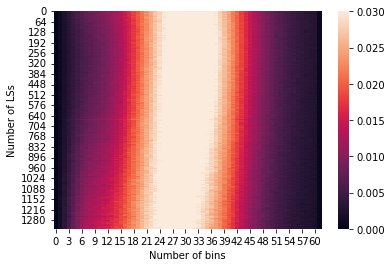

In [56]:
### plot the heatmap
import seaborn as sns
import matplotlib.pylab as plt
sns.heatmap(data_train_dl_highstat, vmin=0, vmax=0.03)
plt.ylabel("Number of LSs")
plt.xlabel("Number of bins")

<class 'numpy.ndarray'>
(1, 1)
31


/tmp/ipykernel_585/564048176.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  trainmaxind.append(np.int(ind[0][0]))


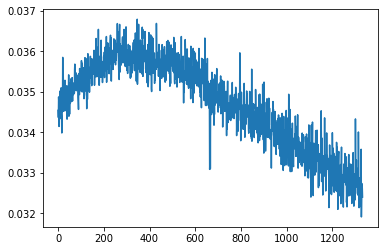

In [59]:
trainhistomax=[]
trainmaxind=[]
shape=(np.shape(data_train_dl_highstat))
a=np.max(data_train_dl_highstat[30])    
b=np.asarray(np.where(data_train_dl_highstat[30]==a))

print(type(b))
print(b.shape)
print(b[0][0])
for i in range(shape[0]):
    maxv=np.max(data_train_dl_highstat[i])
    trainhistomax.append(maxv)
    ind=np.asarray(np.where(data_train_dl_highstat[i]==maxv))
    trainmaxind.append(np.int(ind[0][0]))
plt.plot(trainhistomax)
#plt.plot(trainmaxind)

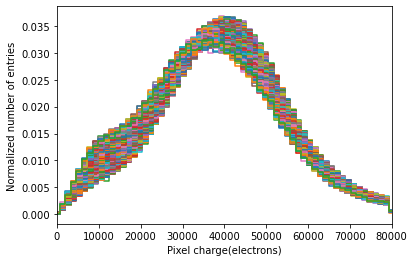

In [61]:
for i in range(1333):
    x= np.linspace(0,80000,62)
    plt.xlim(0,80000)
    plt.step(x, data_train_dl_highstat[i], where='mid')
    plt.ylabel("Normalized number of entries")
    plt.xlabel("Pixel charge(electrons)")

In [64]:
lumi_test=[]
IOV_test=[]
dql_test=[]
customdql_test=[]
Entries_test=[]
for j in range(len(actual_runtest)):
    lumi=func.group_data(lumi_all, run_all, actual_runtest[j])
    iov=func.group_data(IOV_all, run_all, actual_runtest[j])
    dql=func.group_data(label_all, run_all, actual_runtest[j])
    customdql=func.group_data(customlabel_all, run_all, actual_runtest[j])
    Entries=func.group_data(Entries_all, run_all, actual_runtest[j])
    Entries_test.append(Entries)
    IOV_test.append(iov)
    dql_test.append(dql)
    customdql_test.append(customdql)
    lumi_test.append(lumi)

In [68]:
run_higherr=[]    #run number which contains atleast ne LS with high error
run_lowerr=[]  #run number which contains all LS with low error <0.01
lumi_Her=[] # lumisection list with high error
lumi_Ler=[]  #lumisection with low error
dql_Her=[] #dataquality high error
dql_Ler=[]  #dataquality with low error
customdql_Her=[] #custom dataquality high error
customdql_Ler=[]  #custom dataquality with low error
IOV_Her=[] #IOV with high error
IOV_Ler=[] #IOV with low error
data_list_err=[]  #
test_data_list_Her=[] #test histo with high error
test_data_list_Ler=[] # test histo with low wrror
mse_err_list_Her=[]  # mse error high
mse_err_list_Ler=[]  #mse error low
H_Her=[]   #H high err
H_Ler=[]   # H low err
Entries_Her=[]  # entires high error
Entries_Ler=[]  # entries low error
Entries_err=[]  # Entries for each histo
###############
H_lowerr=[]
test_data_list_lowerr=[]
lumi_lowerr=[]
entries_lowerr=[]
mse_err_lowerr=[]
run_lowerr=[]
for i in range(len(actual_runtest)):
#for i in range(3):
    #mse_err_list[i]=np.around(mse_err_list[i],2) # upto 2 decimal places
    check=np.array(mse_err_list[i])
    ind_er=(np.where(check >0.01))
    #print(ind_er)
    if(len(ind_er[0])>0):
        #print('inside loop',len(ind_er[0]))
        lumi_err=func.group_ind(lumi_test[i],ind_er)
        lumi_Her.append(lumi_err)
        lumilow=np.delete(lumi_test[i],ind_er)
        lumi_Ler.append(lumilow)
        iov_err=func.group_ind(IOV_test[i],ind_er)
        IOV_Her.append(iov_err)
        
        iovlow=np.delete(IOV_test[i],ind_er)
        IOV_Ler.append(iovlow)
        dql_err=func.group_ind(dql_test[i],ind_er)
        dql_Her.append(dql_err)
        dqllow=np.delete(dql_test[i],ind_er)
        dql_Ler.append(dqllow)
        customdql_err=func.group_ind(customdql_test[i],ind_er)
        customdql_Her.append(dql_err)
        customdqllow=np.delete(customdql_test[i],ind_er)
        customdql_Ler.append(customdqllow)
        run_higherr.append(actual_runtest[i])
        ent_err=func.group_ind(Entries_test[i],ind_er)
        Entries_Her.append(ent_err)
        ent_err1=np.delete(Entries_test[i],ind_er)
        Entries_Ler.append(ent_err1)
        datatemp=func.group_ind(test_data_list[i],ind_er)
        test_data_list_Her.append(datatemp)
        datatemp1=np.delete(test_data_list[i],ind_er,axis=0)
        test_data_list_Ler.append(datatemp1)
        htemp=func.group_ind(H_all[i],ind_er)
        H_Her.append(htemp)
        htemp1=np.delete(H_all[i],ind_er,axis=0)
        H_Ler.append(htemp1)
        data_list_err.append(test_data_list[i])
        mse_err=func.group_ind(mse_err_list[i],ind_er)
        msetemp=np.delete(mse_err_list[i],ind_er)
        mse_err_list_Her.append(mse_err)
        mse_err_list_Ler.append(msetemp)
    else:
        run_lowerr.append(actual_runtest[i])
        H_lowerr.append(H_all[i])
        test_data_list_lowerr.append(test_data_list[i])
        lumi_lowerr.append(lumi_test[i])
        entries_lowerr.append(Entries_test[i])
        mse_err_lowerr.append(mse_err_list[i])
        run_lowerr.append(actual_runtest[i])

In [69]:

count=0
indcount=0

for i in range (len(actual_runtest)):
    count=count+len(mse_err_list[i])
    indices = np.count_nonzero(dql_test[i])  
    indcount=indcount+indices
    #print(len(indices))
print("total LS", count)   
print("good LS", indcount)
higherrLs=0
higherrTrue=0
for i in range (len(mse_err_list_Her)):
    Hel=len(mse_err_list_Her[i])
    higherrLs=higherrLs+Hel
    indices = np.count_nonzero(dql_Her[i])
    #print(dql_err_list[i])
    #print(mse_err_list_Her[i])
    higherrTrue=higherrTrue+indices
print("high Error LS", higherrLs)
print("high Errror LS with good tag", higherrTrue)

total LS 12572
good LS 11517
high Error LS 1848
high Errror LS with good tag 1626


In [70]:
ref_size=refrun_train.shape[0]
all_comp_fact=[]
for i in range(ref_size):
    
    comp_fact=func.comp_dist(i,W_ref, H_ref)
    #print(comp_fact)
    all_comp_fact.append(comp_fact)
all_comp_fact_T=np.transpose(all_comp_fact)  

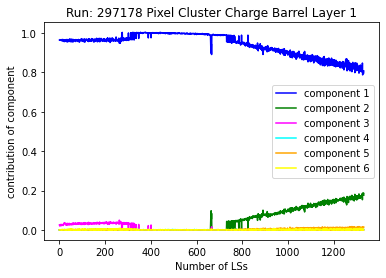

In [71]:
func.plot_compCont(all_comp_fact_T, ref_run)
#plt.savefig("PixelClusterChargeBarrelLayer1_component_contribution_"+str(ref_run)+".png")

In [78]:
import pathlib
import os
directory = "contribution"+str(ref_run)
parent_dir="/eos/user/a/anushree/SWAN_projects/ML_Per_LS_DQMIO_Data_test/PixelStudy"
path=os.path.join(parent_dir,directory)
isExist = os.path.exists(path)
if not isExist:
    os.mkdir(path)
for k in range(len(actual_runtest)):
    test_size=test_data_list[k].shape[0]
    all_comp_fact_test=[]
    for i in range(test_size):
        comp_fact=func.comp_dist(i,W_ref, H_all[k])
        all_comp_fact_test.append(comp_fact)
    all_comp_fact_test_T=np.transpose(all_comp_fact_test)
    #plt.subplots()
    #func.plot_compConttwo(all_comp_fact_test_T,actual_runtest[k],dql_test[k])
    #file_path=pathlib.Path(path+"/PixelClusterChargeBarrelLayer1_component_contribution_testrunfor_"+str(ref_run)+"_"+str(actual_runtest[k]))
    #plt.savefig(str(file_path)+".png")  

In [74]:
dql_seccomp=[]
dql_fstcomp=[]
runHC2nd=[]
lumiHC2nd=[]
runLC2nd=[]
lumiLC2nd=[]
for i in range(len(actual_runtest)):
    size=H_all[i].shape[0]
    
    for j in range(0,size):
        check=func.component(j,W_ref,H_all[i],1,0.1)
        if(check):
            if(mse_err_list[i][j]>0.01):
                #print(actual_runtest[i],lumi_test[i][j], dql_test[i][j], i, j) 
                runHC2nd.append(actual_runtest[i])
                lumiHC2nd.append(lumi_test[i][j])
                dql_seccomp.append(dql_test[i][j])
                #print("second comp",mse_err_list[i][j],actual_runtest[i],lumi_test[i][j], dql_test[i][j], i, j)
        checkl=func.firstcomponent(j,W_ref,H_all[i],0,0.9)
        if(checkl):
            #mse_err_list[i][j]='{0:.4f}'.format(mse_err_list[i][j])
            if(mse_err_list[i][j]<0.007):
                runLC2nd.append(actual_runtest[i])
                lumiLC2nd.append(lumi_test[i][j])
                dql_fstcomp.append(dql_test[i][j])
                #print("first comp",mse_err_list[i][j],actual_runtest[i],lumi_test[i][j], dql_test[i][j], i, j)
           

In [75]:
print(np.shape(lumiHC2nd))
print(np.shape(lumiLC2nd))
#print(lumiLC2nd)
#print(runLC2nd)
print("good", np.count_nonzero(dql_seccomp))
print("total",len(dql_seccomp))
print(np.count_nonzero(dql_fstcomp))
print(len(dql_fstcomp))

(1843,)
(7044,)
good 1626
total 1843
6373
7044


6
89.72
0.897247536150054 0
8.85
0.08850440822939858 1
0.15
0.0014583848425978063 2
0.23
0.002327107265850408 3
0.84
0.008381743667403376 4
0.36
0.0035766988279385737 5
tottttttttt   1.0014958789832427
1.0
(62,)
err 0.0005892097553099087


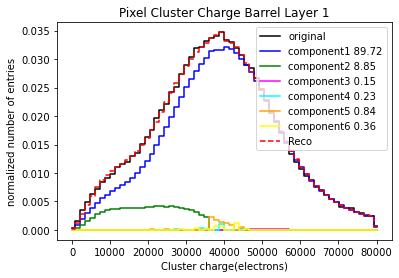

In [76]:
func.plotDecomposition_notallcomp(20,test_data_list[12],W_ref,H_all[12],"test_")

tot shape (30, 62)
truedata.shape (62,)
6
(30, 6)
tot shape after multiplication before mean= (30, 62)
tot shape after multiplication= (62,)
tot shape of Haverage= (6,)
73.99
25.63
0.00
0.79
3.11
0.97
err 0.005346516562838085


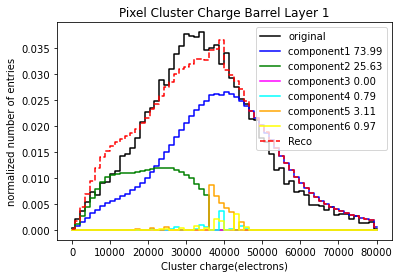

In [77]:
func.plotDecomposition_average(test_data_list[27],W_ref,H_all[27],"test_")